In [15]:
# Import the NetworkX package
import networkx as nx

In [16]:
G = nx.Graph() # create graph

G.graph["Name"] = "Bar" # Add graph level attribute

G.add_node(0, feature=0, label=0) # Add one node with node level attributes
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

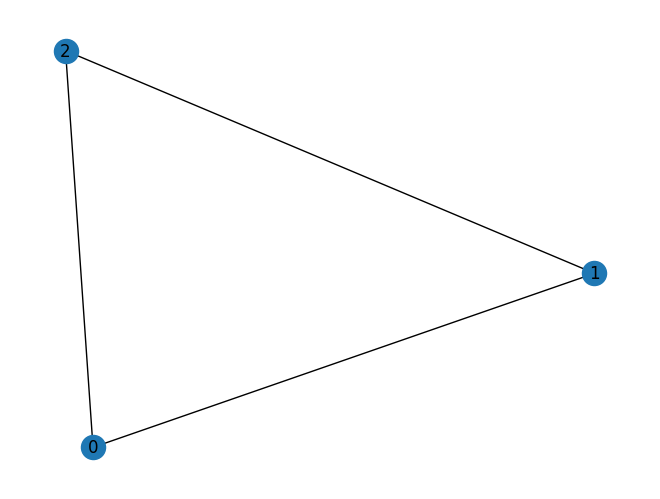

In [17]:
# Draw the graph
nx.draw(G, with_labels = True)

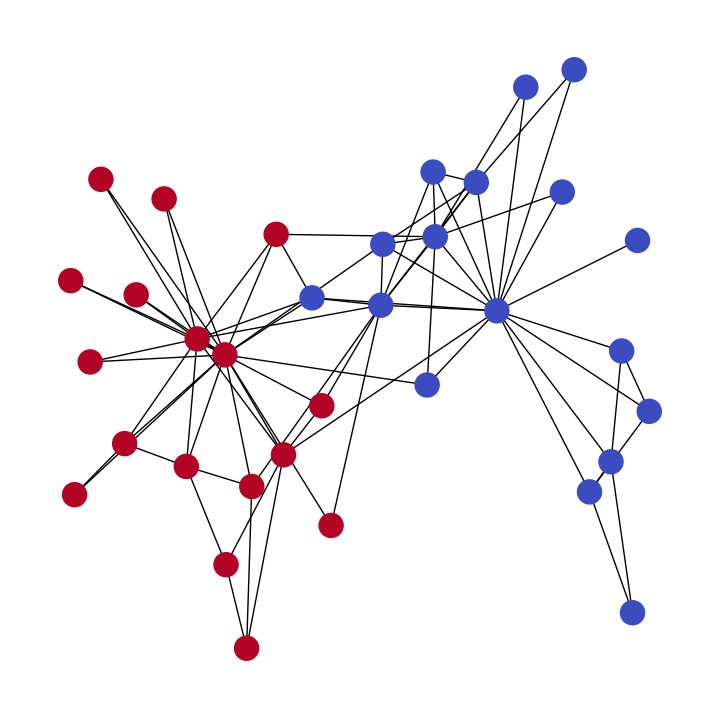

In [22]:

from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
import copy
import os


from pylab import show
G = nx.karate_club_graph()
community_map = {}
for node in G.nodes(data=True):
  if node[1]["club"] == "Mr. Hi":
    community_map[node[0]] = 0
  else:
    community_map[node[0]] = 1
node_color = []
color_map = {0: 0, 1: 1}
node_color = [color_map[community_map[node]] for node in G.nodes()]
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color)
show()

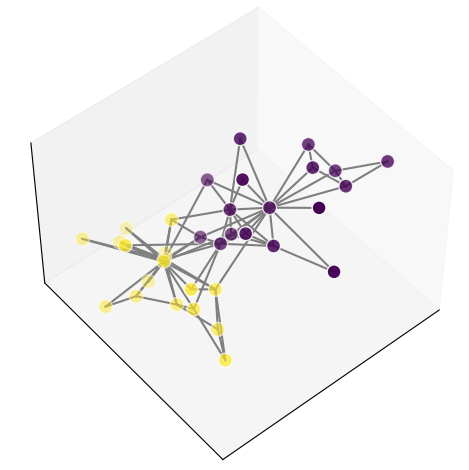

In [35]:
import numpy as np
import matplotlib.animation as animation
# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])
# function of a view
def animate(azimuth):
    # Create the 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",c=node_color)
    # Plot the edges
    for vizedge in edge_xyz:
        ax.plot(*vizedge.T, color="tab:gray")
    ax.view_init(elev=50., azim=azimuth)


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        #ax.axis('off')
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])

        # Set axes labels
        #ax.set_xlabel("x")
        #ax.set_ylabel("y")
        #ax.set_zlabel("z")

    _format_axes(ax)
    fig.tight_layout()
plt.show()


In [13]:
A = np.array([1,2,3])
print(*A)

1 2 3
